In [196]:
from SRC.jup_sucio.librerias import *

In [189]:
btc = pd.read_csv ('Data/btc_limp.csv')

btc.set_index('Date', inplace=True)

btc.index = pd.to_datetime(btc.index)

btc = btc.resample('W').first()

btc = btc.loc['2014-01-01':]

data = btc ['Open']



In [190]:
short_window = 30
long_window = 100

señales = pd.DataFrame (index = data.index)
señales ["signals"] = 0
señales ['Open'] = btc ['Open']

In [191]:
señales["short"] = data.rolling(short_window).mean()

señales["long"] = data.rolling(long_window).mean()

señales["signals"] = np.where(señales["short"] > señales["long"], 1, 0)

señales["positions"] = señales["signals"].diff()


In [195]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
señales.head ()

,signals,Open,short,long,positions
Date,,,,,
2014-01-05,0,785,NaN,NaN,NaN
2014-01-12,0,1014,NaN,NaN,0.0
2014-01-19,0,939,NaN,NaN,0.0
2014-01-26,0,954,NaN,NaN,0.0
2014-02-02,0,1007,NaN,NaN,0.0


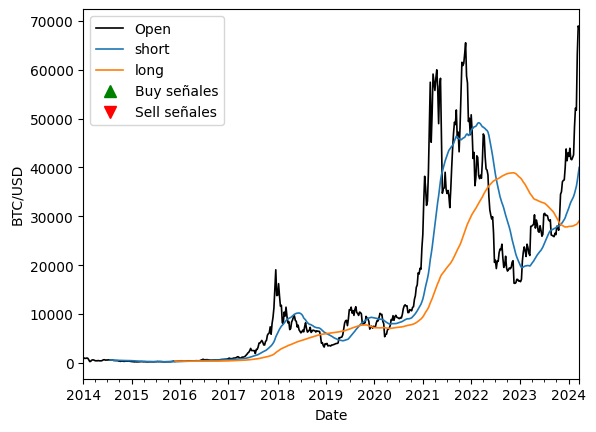

In [193]:

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="BTC/USD")
data.plot(ax=ax1, color="k", lw=1.2)
señales[["short", "long"]].plot(ax=ax1, lw=1.2)

# Plot de los puntos de compra y venta
ax1.plot(señales["short"][señales["positions"] == 1].index,
         señales["short"][señales["positions"] == 1],
         "^", markersize=8, color="g", lw=0, label="Buy señales")

ax1.plot(señales["short"][señales["positions"] == -1].index,
         señales["short"][señales["positions"] == -1],
         "v", markersize=8, color="r", lw=0, label="Sell señales")

plt.legend()
plt.show()


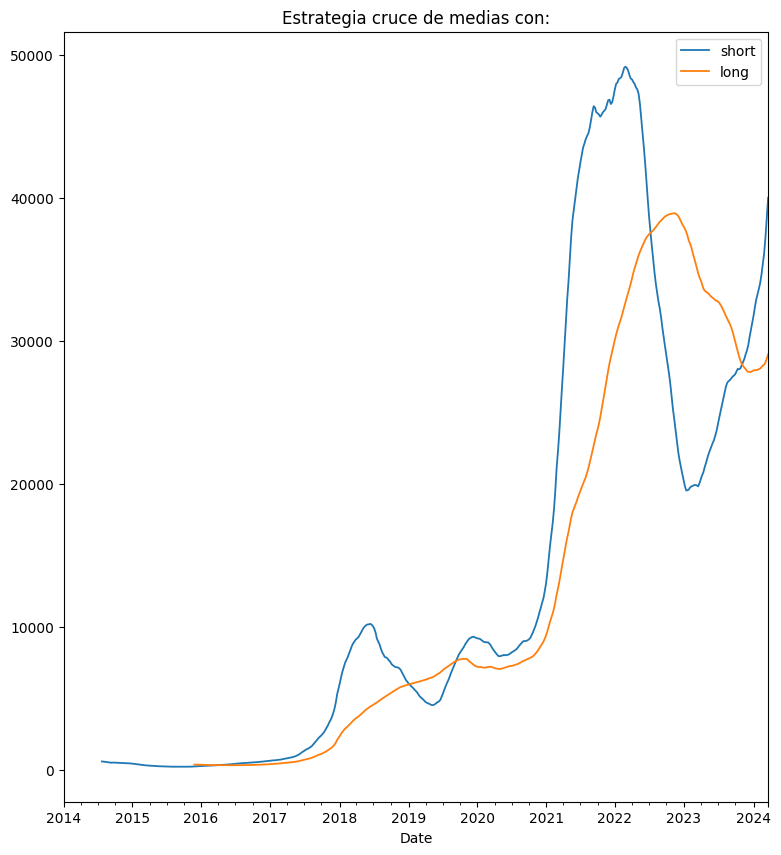

In [194]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.set_title("Estrategia cruce de medias con:")

señales[['short', 'long']].plot(ax=ax1, lw=1.3)
ax1.plot(señales['short'][señales['positions'] == 1], '^', markersize=8, color='g')
ax1.plot(señales['short'][señales['positions'] == -1], 'v', markersize=8, color='r')